In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Which is the odd one out of this set of stable and profitable investments: gold, silver, crude oil, banks deposits or machine learning and cloud computing services (ML&CCS)? “For sure machine learning!”- I guess many people would suggest immediately, especially those who are not involved in Data Science. And they will be very likely to be mistaken because, depending on the bank, you would hardly find annual rate of deposit return higher than 10%...

Let’s take a look how it’s going…

**What is the investment here?** The 2020 Survey Q25 (“Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years ( approximate $USD )?”) can be interpret as “how much money have you invested in ML&CCS within last 5 years?”. The amount of investment will be the sum of spending for ML&CCS. Since it’s asking about 5 years we can compare these ML&CCS investments with other 5 years’ investment projects. 

**What will be the income from such an investment project?** 2020 Survey Q24 (“What is your current yearly compensation (approximate $USD)?”) gives information about money people earn by doing different kinds of Data Science, Data Engineering and other Big Data related work. Since ML frameworks, tools, algorithms and methods, roughly speaking, form the basis for Data Science activities and in 2020 Survey Q25 it’s not specified what types of ML&CCS spending were counted in it (so we guess it may be any relative type of spending), we can say that declared compensations are income from ML&CCS investments. For respondents with roles “Database engineer”, “Software engineer” and “Statistician” ML may not be so often the main part of work but they took part in this Survey and named for Q25 some amounts of ML&CCS investment. Also Survey respondents with all roles definitely may have demand in CCS. So Q24 and Q25 answers of respondents with roles “Database engineer”, “Software engineer” and “Statistician” were as well included in this research.  

**What is the data population?** We'll take into consideration only those Survey respondents, who answered both questions: Q24 and Q25, including those cases when people gave answer “0” in Q24. But we exclude from this analysis answers of respondents identifying themselves as “students” and “Other” because students for objective reasons usually don’t have access to competitive full time jobs before graduating and the “Other” category is something completely uncertain. The “Currently not employed” answer category is not excluded from the analysis because somebody might has invested in ML&CCS within the last 5 years but be out of work at the moment for some reasons and such situation also reflects sustainability of ML&CCS investments.  

**How profitability is measured?** One of the most common measures of investment efficiency is Return On Investment (ROI), which in general is calculated as net income divided by investment [1]. In our case to estimate profitability of ML&CCS investment in average we can sum all the spendings and all the compensations of the chosen respondents and calculate ROI as following:


ROI=(∑compensations-∑spendings)/(∑spendings)

**How intervals in Q24 and Q25 answers are aggregated?** Since the answers for Survey Q24 and Q25 are intervals, for the first-time estimation we’ll take their average for calculation Return On Investment as we don’t have any additional parameters to build segmentation or distribution inside these intervals (it might be point for a further development of this research). For Q25 answer “100,000 or more (USD)” we’ll use in calculation value 100,001 USD as we don’t know how much money more than 100,000 USD were spent for ML&CCS in corresponding answers and this category of answers is the most valuable for the sum of spendings so any tiny shift of its value could influence greatly on the result. For the same reasons for Q24 answer “> 500,000” in calculations we’ll use value 500,001 USD.

In [ ]:
df=pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)

#delete all what we don't use in this analysis
df2=df.dropna(subset=['Q24', 'Q25'])
df2.drop([0],inplace=True)
df2.drop(df2.loc[df2['Q25']=='$0 ($USD)'].index, inplace=True)

#replace values for calculation ROI in Spendings
df2['Q25'].loc[(df['Q25'] == '$1-$99')] = 50
df2['Q25'].loc[(df['Q25'] == '$100-$999')] = 500
df2['Q25'].loc[(df['Q25'] == '$1000-$9,999')] = 5000
df2['Q25'].loc[(df['Q25'] == '$10,000-$99,999')] = 50000
df2['Q25'].loc[(df['Q25'] == '$100,000 or more ($USD)')] = 100001

#replace values for calculation ROI in Compensations
df2['Q24'].loc[(df['Q24'] == '$0-999')] = 500
df2['Q24'].loc[(df['Q24'] == '1,000-1,999')] = 1500
df2['Q24'].loc[(df['Q24'] == '2,000-2,999')] = 2500
df2['Q24'].loc[(df['Q24'] == '3,000-3,999')] = 3500
df2['Q24'].loc[(df['Q24'] == '4,000-4,999')] = 4500
df2['Q24'].loc[(df['Q24'] == '5,000-7,499')] = 6250
df2['Q24'].loc[(df['Q24'] == '7,500-9,999')] = 8750
df2['Q24'].loc[(df['Q24'] == '10,000-14,999')] = 12500
df2['Q24'].loc[(df['Q24'] == '15,000-19,999')] = 17500
df2['Q24'].loc[(df['Q24'] == '20,000-24,999')] = 22500
df2['Q24'].loc[(df['Q24'] == '25,000-29,999')] = 27500
df2['Q24'].loc[(df['Q24'] == '30,000-39,999')] = 35000
df2['Q24'].loc[(df['Q24'] == '40,000-49,999')] = 45000
df2['Q24'].loc[(df['Q24'] == '50,000-59,999')] = 55000
df2['Q24'].loc[(df['Q24'] == '60,000-69,999')] = 65000
df2['Q24'].loc[(df['Q24'] == '70,000-79,999')] = 75000
df2['Q24'].loc[(df['Q24'] == '80,000-89,999')] = 85000
df2['Q24'].loc[(df['Q24'] == '90,000-99,999')] = 95000
df2['Q24'].loc[(df['Q24'] == '100,000-124,999')] = 112500
df2['Q24'].loc[(df['Q24'] == '125,000-149,999')] = 137500
df2['Q24'].loc[(df['Q24'] == '150,000-199,999')] = 175000
df2['Q24'].loc[(df['Q24'] == '200,000-249,999')] = 225000
df2['Q24'].loc[(df['Q24'] == '250,000-299,999')] = 275000
df2['Q24'].loc[(df['Q24'] == '300,000-500,000')] = 275000
df2['Q24'].loc[(df['Q24'] == '> $500,000')] = 500001

df3=df2

ROI = (df3['Q24'].sum()-df3['Q25'].sum())/df3['Q25'].sum()
print(ROI)
df3.to_csv('submission.csv', index = False)

After calculating we got **ROI 1,57** (or **157%**) for ML&CCS. Roughly speaking it means that sum of X USD invested in ML&CCS in 5 years will bring (1,57X) of profit. 

Great! Now we know the present profitability of ML&CCS but to understand how attractive it is in terms of investment **we need to compare it with other assets/investment projects.** The variety of latter can be mindblowing: they differ by the structure, periods, interest, national context and many other things. So let’s take a look at some types of assets which have been already internationally recognized as stable and profitable for already long time – precious metals, namely, gold, silver, platinum and palladium. As we compare profitability of 5 year investment projects, we need to find how prices for these metals grew from 2015 to 2020. This growth will be equal to their profit. As modern economic, financial and political worlds change extremely rapidly we will compare our 2015-2020 ML&CCS investment projects with other investment projects only for the same years 2015-2020 (not with any average of 5 year investment projects of different years).

**Since gold, silver, platinum and palladium** are very popular investment instruments and we need just two values of price for each of them. So the easiest way to find it will be to google it in internet, just taking the numbers from the results list of search engine. I’ve made it and here are the results:


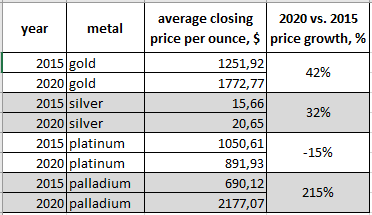

We can compare profitability of ML&CCS and precious metals in more convenient way with help of a following radar chart:

In [ ]:
import plotly.graph_objects as go


categories = ['gold','silver','platinum',
           'palladium', 'ML&CCS']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[42, 32, -15, 215,''],
      theta=categories,
      fill='toself',
      name='Precious metals'
))
fig.add_trace(go.Scatterpolar(
      r=[157, 157, 157, 157, 157],
      theta=categories,
      fill='toself',
      name='ML&CCS'
))

fig.update_layout(
    title="Profitability of ML&CCS and precious metals, %",
    legend_title="Assets",
   )


fig.show()


We clearly see that gold and silver and platinum are far behind behind ML&CCS as investment instruments with much lower ROI for 2015-2020 period. And only palladium shows the greater results than ML&CCS and beats it with 215% of profitability.
To be more convincing in proving of ML&CCS investment attractiveness, let’s compare it's profitability with **some other assets on high constant demand**. We can choose them from different fields, for example, sugar and coffee from food commodities, cotton from textile and copper as industrial resource. 2015 and 2020 prices for this set of assets were once again sourced online via a quick Google search:


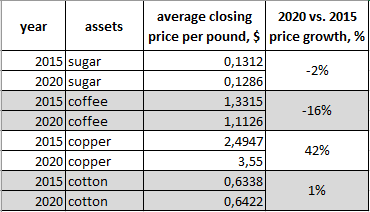

For better visualization let’s make radar chart:

In [ ]:
categories = ['sugar','coffee','copper',
           'cotton', 'ML&CCS']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[-2, -16, 42, 1,''],
      theta=categories,
      fill='toself',
      name='Other assets'
))
fig.add_trace(go.Scatterpolar(
      r=[157, 157, 157, 157, 157],
      theta=categories,
      fill='toself',
      name='ML&CCS'
))

fig.update_layout(
    title="Profitability of ML&CCS and other assets, %",
    legend_title="Assets",
   )

fig.show()

On the chart we see that for copper, cotton, sugar and coffee blue area is deeply inside red one what illustrates that their profitability is much less than ML&CCS has for 2015-2020 years.
Searching for investment projects, one of the first ideas which comes to mind is to check what banks offer for this purpose – **deposits, investment accounts, etc.** I’ve checked a dozen of top banks and they offer a lot… The problem is that the variety and complexity of investment projects and instruments offered by banks is so big that it’s quite difficult to match them in terms of profitability. That’s why for now I leave this type of investment for further explorations.

This research is just a tiny step towards estimation of ML&CCS worth for economic development of countries, its value for companies’ business improvement and for professional growth of any individual. There are many aspects in this huge field of research which definitely cannot be covered in such a small notebook but it shows that at least
**in financial way if You invest in ML&CCS your profit will be one of the best which modern markets can offer,
even better than Gold.**


References:
1.	https://en.wikipedia.org/wiki/Return_on_investment


In [ ]:
create_test_submission